## Importing libraries

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

## Load dataset

In [2]:
data_df = pd.read_csv(r"C:\Users\PRANIL\OneDrive\Desktop\delamnew.csv")

In [3]:
data_df

,drillbit_dia,speed,feed,delam
0,8,800,0.05,8.53
1,8,800,0.10,8.00
2,8,800,0.15,8.13
3,8,800,0.20,8.27
4,8,800,0.25,8.00
...,...,...,...,...
95,8,3600,0.30,11.32
96,8,3600,0.35,8.25
97,8,3600,0.40,8.12
98,8,3600,0.45,8.40


In [4]:
data_df.columns

Index(['drillbit_dia', 'speed ', 'feed ', 'delam'], dtype='object')

In [7]:
print(data_df.head(25))

    drillbit_dia  speed   feed    delam
0              8     800   0.05   8.530
1              8     800   0.10   8.000
2              8     800   0.15   8.130
3              8     800   0.20   8.270
4              8     800   0.25   8.000
5              8     800   0.30   8.850
6              8     800   0.35   8.560
7              8     800   0.40   8.050
8              8     800   0.45  10.520
9              8     800   0.50  10.360
10             8    1000   0.05   8.170
11             8    1000   0.10   8.040
12             8    1000   0.15   9.000
13             8    1000   0.20   9.100
14             8    1000   0.25  12.760
15             8    1000   0.30   9.500
16             8    1000   0.35   9.630
17             8    1000   0.40   8.360
18             8    1000   0.45   8.369
19             8    1000   0.50   8.060
20             8    1200   0.05   9.560
21             8    1200   0.10  11.900
22             8    1200   0.15  10.300
23             8    1200   0.20   9.000


## Describing data 

In [11]:
data_df.describe()

,drillbit_dia,speed,feed,delam
count,100.0,100.000000,100.000000,100.000000
mean,8.0,2000.000000,0.275000,9.572360
std,0.0,921.132373,0.144338,1.383862
min,8.0,800.000000,0.050000,8.000000
25%,8.0,1200.000000,0.150000,8.366750
50%,8.0,1800.000000,0.275000,9.310000
75%,8.0,2800.000000,0.400000,10.360000
max,8.0,3600.000000,0.500000,12.977000


## Defining X and Y variable

In [12]:
X = data_df.drop('delam', axis = 1)
y = data_df['delam']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.08, random_state = 20)

# 0.08 means 8% of data is assigned for test 
#when random_state set to an integer, train_test_split will return same results for each execution.
#when random_state set to an None, train_test_split will return different results for each execution

## Standard scaler

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()     # standardscaler to scale to sertain number 
scaler.fit(X_train)

StandardScaler()

In [15]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model development

In [16]:
model = Sequential()
model.add(Dense(128, input_dim=3, activation='relu'))  #3 features 
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))     # 1 output 

In [17]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)

Epoch 1/100
3/3 [==============================] - 0s 37ms/step - loss: 2.5462 - mae: 1.2713 - val_loss: 2.3668 - val_mae: 1.2512
Epoch 2/100
3/3 [==============================] - 0s 21ms/step - loss: 2.5316 - mae: 1.2712 - val_loss: 2.3764 - val_mae: 1.2528
Epoch 3/100
3/3 [==============================] - 0s 29ms/step - loss: 2.5203 - mae: 1.2645 - val_loss: 2.3771 - val_mae: 1.2568
Epoch 4/100
3/3 [==============================] - 0s 26ms/step - loss: 2.5130 - mae: 1.2581 - val_loss: 2.3658 - val_mae: 1.2584
Epoch 5/100
3/3 [==============================] - 0s 22ms/step - loss: 2.5064 - mae: 1.2511 - val_loss: 2.3359 - val_mae: 1.2554
Epoch 6/100
3/3 [==============================] - 0s 26ms/step - loss: 2.4933 - mae: 1.2565 - val_loss: 2.2452 - val_mae: 1.2244
Epoch 7/100
3/3 [==============================] - 0s 30ms/step - loss: 2.4624 - mae: 1.2640 - val_loss: 2.1820 - val_mae: 1.2129
Epoch 8/100
3/3 [==============================] - 0s 26ms/step - loss: 2.4544 - mae: 1.26

## Plot training and validation accuracy 

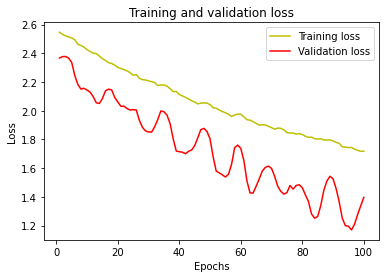

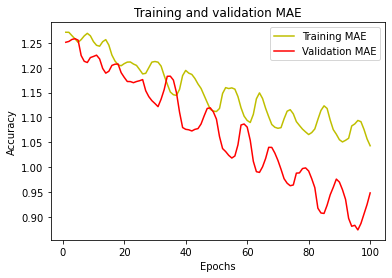

In [27]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Prediction

In [28]:
#Predict on test data
predictions = model.predict(X_test_scaled[:2])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:2])

Predicted values are:  [[9.450489]
 [9.713173]]
Real values are:  70    9.36
74    9.35
Name: delam, dtype: float64


# Error

In [29]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

1/1 [==============================] - 0s 31ms/step - loss: 1.2271 - mae: 0.9048
Mean squared error from neural net:  1.2271339893341064
Mean absolute error from neural net:  0.9048079252243042
